In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.io as sio
import scipy.linalg as slg
import math
import random
from andylearn import mnist, KNNneighbor, PCA
#%matplotlib inline

In [155]:
def LDE(data, label, k, k_, d, t=40, pca_op=1):
    '''
    data is the original data. m*n(m=samples, n=dimensions)
    '''
    data = np.matrix(data)
    N = data.shape[0]
    c = len(np.unique(label))

    # W_opt.T = W_fld.T * W_pca.T
    # W_pca
    # Get the principal components of PCA with N-c largest eigenvalues
    if(pca_op==1):
        W_pca, data_pca, average= PCA.PCA(data, N-c)
    else:
        data_pca = data
   
    Dim = data_pca.shape[1]
    
    # step 1
    # find the nearest neighbors (k). Here we get the distance from (x-y)^2
    # distance N*N
   
    data_tmp = np.sum(np.multiply(data_pca, data_pca), axis=1)
    distance=np.mat(data_tmp + data_tmp.T - 2*data_pca*data_pca.T)
    
    # the all neibors N
    neighbors = np.argsort(distance,axis=1)
    neighbors = neighbors[:, 1:]
    
    # step 2
    # weights
    
    W=np.zeros([N,N])
    D=np.zeros([N,N])
    
    W_=np.zeros([N,N])
    D_=np.zeros([N,N])
    
    for i in range(N):
        K=0
        K_=0
        for j in neighbors[i].A[0]:
            if (label[j]==label[i]):
                if(K<k):
                    W[i, j] = math.exp(-distance[i, j]/t)
                    W[j, i] = math.exp(-distance[i, j]/t) 
                    K+=1
            else:
                if(K_<k_):
                    W_[i, j] = math.exp(-distance[i, j]/t)
                    W_[j, i] = math.exp(-distance[i, j]/t) 
                    K_+=1
        
   
    for i in range(N):
        for j in range(N):
            D[i, i] +=W[i, j] 
            D_[i, i] +=W_[i, j]
    
    # Step 3
    # mappings 
    
    L=D-W
    L_=D_-W_
    eigenValues, eigenVectors=slg.eig(np.dot(np.dot(data_pca.T, L_),data_pca), np.dot(np.dot(data_pca.T, L), data_pca))
    eigenValuesSort=np.argsort(-eigenValues)
    W_lde = eigenVectors[:, eigenValuesSort[0:d]]
   
    
    print("LDE done")
    if(pca_op==1):
        return np.dot(W_pca, W_lde)
    else:
        return W_lde
    

before [[ 0  5  1  4  9  3  2  8  6  7 16 18 15 17 19 11 14 12 10 13]
 [ 1  0  3  5  9  4  2  8  6  7 16 18 15 17 19 11 14 12 10 13]
 [ 2  4  5  0  6  9  1  8  3  7 18 16 15 17 19 11 14 12 10 13]
 [ 3  1  0  9  5  8  4  6  2  7 16 18 15 17 19 11 14 10 12 13]
 [ 4  5  0  2  6  9  8  1  7  3 16 18 15 17 19 11 14 12 10 13]
 [ 5  4  0  9  2  6  8  1  3  7 16 18 15 17 19 11 14 12 10 13]
 [ 6  8  4  5  9  7  2  0  1  3 16 18 15 17 19 11 14 10 12 13]
 [ 7  8  6  9  4  5  0  2  3  1 16 18 15 17 19 11 14 10 12 13]
 [ 8  9  6  7  4  5  0  3  2  1 16 18 15 17 19 11 14 10 12 13]
 [ 9  8  5  4  0  6  3  1  7  2 16 18 15 17 19 11 14 10 12 13]
 [10 12 14 19 17 11 13 15 18 16  3  1  0  9  5  8  4  2  6  7]
 [11 13 14 12 10 19 17 18 15 16  3  1  0  9  5  4  8  2  6  7]
 [12 14 10 19 11 13 17 15 18 16  3  1  0  9  5  4  8  2  6  7]
 [13 11 12 14 10 19 17 18 15 16  3  1  0  9  5  4  8  2  6  7]
 [14 12 10 19 11 17 13 15 18 16  3  1  0  9  5  4  8  2  6  7]
 [15 17 19 16 14 10 12 18 11 13  3  1  0  9  5  

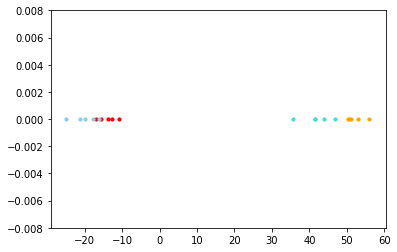

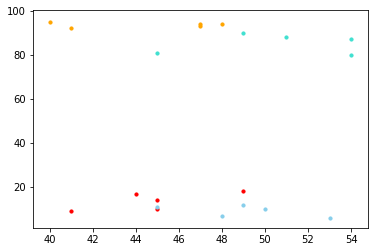

In [156]:
original_data = []
label = []
N=5
for i in range(N):
    x = random.randint(40, 50)
    y = random.randint(8, 18)
    original_data.append([x, y])
    label.append(1)
for i in range(N):
    x = random.randint(45, 55)
    y = random.randint(2, 12)
    original_data.append([x, y])
    label.append(2)
for i in range(N):
    x = random.randint(40, 50)
    y = random.randint(90, 98)
    original_data.append([x, y])
    label.append(3)
for i in range(N):
    x = random.randint(45, 55)
    y = random.randint(80, 90)
    original_data.append([x, y])
    label.append(4)


original_data=np.matrix(original_data)

mapping = LDE(original_data, label, 5, 2, 1, pca_op=0)
print(mapping)
low_data = np.dot(original_data, mapping)
fig = plt.figure()
plotwindow = fig.add_subplot(111)

a = np.array(low_data)
# draw the scatters
color = ['red','skyblue','orange','turquoise']
for j in range(len(a)):
    plt.scatter(a[j][0],0,c=color[label[j]-1],s=10)
plt.show()

a = np.array(original_data)
# draw the scatters
color = ['red','skyblue','orange','turquoise']
for j in range(len(a)):
    plt.scatter(a[j][0],a[j][1],c=color[label[j]-1],s=10)
plt.show()

In [56]:
def TwoD_LDE(data, label, k, k_, n_1, n_2, l_1, l_2, repeatNum, t=40):
    '''
    data is the original data. m*n(m=samples, n=dimensions)
    '''
    N = data.shape[0]
    Dim = data.shape[1]
    
    # step 1
    # find the nearest neighbors (k). Here we get the distance from (x-y)^2
    # distance N*N
   
    data_tmp = np.sum(np.multiply(data, data), axis=1)
    distance=np.mat(data_tmp + data_tmp.T - 2*data*data.T)
    
    # the all neibors N
    neibors = np.argsort(distance,axis=1)
    
    
    # step 2
    # weights
    
    W=np.zeros([N,N])
    D=np.zeros([N,N])

    W_=np.zeros([N,N])
    D_=np.zeros([N,N])
    for i in range(N):
        K=0
        K_=0
        for j in neibors[i].A[0]:
            if (label[j]==label[i]):
                if(K<k):
                    W[i, j] = math.exp(-distance[i, j]/t)
                    W[j, i] = math.exp(-distance[i, j]/t) 
                    K +=1
            else:
                if(K_<k_):
                    W_[i, j] = math.exp(-distance[i, j]/t)
                    W_[j, i] = math.exp(-distance[i, j]/t) 
                    K_ += 1
    
    
    # Step 3
    # mappings 
    
    # initial L
    L = np.ones((n_1, l_1))
    for count in range(repeatNum):
        for i in range(N):
            A_i = data[i, :].reshape((n_1, n_2))
            for j in range(N):
                A_j = data[j, :].reshape((n_1, n_2))
                R_L = W_[i, j]*np.dot(np.dot(np.dot((A_i-A_j).T, L), L.T), (A_i-A_j))
                R_R = W[i, j]*np.dot(np.dot(np.dot((A_i-A_j).T, L), L.T), (A_i-A_j))
            eigenValues, eigenVectors = slg.eig(R_L, R_R)
            eigenValuesSort=np.argsort(-eigenValues)
            R=np.mat(eigenVectors[:,eigenValuesSort[0:l_2]])
            
        for i in range(N):
            A_i = data[i, :].reshape((n_1, n_2))
            for j in range(N):
                A_j = data[j, :].reshape((n_1, n_2))
                L_L = W_[i, j]*np.dot(np.dot(np.dot((A_i-A_j).T, L), L.T), (A_i-A_j))
                L_R = W[i, j]*np.dot(np.dot(np.dot((A_i-A_j).T, L), L.T), (A_i-A_j))
        eigenValues, eigenVectors = slg.eig(L_L, L_R)
        eigenValuesSort=np.argsort(-eigenValues)
        L=np.mat(eigenVectors[:,eigenValuesSort[0:l_1]])
        
    return L, R

In [57]:
def Kernel_LDE(data, label, k, k_, d, t=40):
    '''
    data is the original data. m*n(m=samples, n=dimensions)
    '''
    data=np.matrix(data)
    N = data.shape[0]
   
    
    # step 1
    # find the nearest neighbors (k). Here we get the distance from (x-y)^2
    # distance N*N
    data_tmp = np.sum(np.multiply(data, data), axis=1)
    distance=np.mat(data_tmp + data_tmp.T - 2*data*data.T)
    # the all neibors N
    neibors = np.argsort(distance,axis=1)
    
    
    # step 2
    # weights
    
    W=np.zeros([N,N])
    D=np.zeros([N,N])
    
    W_=np.zeros([N,N])
    D_=np.zeros([N,N])
    
    for i in range(N):
        K=0
        K_=0
        for j in neibors[i].A[0]:
            if (label[j]==label[i]):
                if(K<k):
                    W[i, j] = math.exp(-distance[i, j]/t)
                    W[j, i] = W[i, j]
                    K+=1
            else:
                if(K_<k_):
                    W_[i, j] = math.exp(-distance[i, j]/t)
                    W_[j, i] =  W_[i, j] 
                    K_+=1
    
    for i in range(N):
        for j in range(N):
            D[i, i] +=W[i, j] 
            D_[i, i] +=W_[i, j]
    
    Km=np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            Km[i, j] = math.exp(-distance[i, j]/t)
    
    
    # Step 3
    # mappings 
    
    L=D-W
    L_=D_-W_
    ei_L=np.dot(np.dot(Km, L_), Km)
    ei_R=np.dot(np.dot(Km, L), Km)
    eigenValues, eigenVectors=slg.eig(ei_L, ei_R)
    eigenValuesSort=np.argsort(-eigenValues)
    mapping = eigenVectors[:, eigenValuesSort[0:d]]
    
    return mapping, Km

In [110]:
data=sio.loadmat("data/orl_faces/32_32/ORL_32x32.mat")
face = data['fea']/256
face = np.squeeze(face)
label = data['gnd']
label = np.squeeze(label)

In [111]:
def LDE_ORL_acuracy(l, method='' ):
    ## 32 * 32 ORL_faces 
    s=0.0
    for i in range(50):
        matfn = 'data/orl_faces/32_32/'+str(l)+'Train/'+str(i+1)+'.mat'
        index = sio.loadmat(matfn)
        testIdx = index['testIdx'] -1  
        trainIdx = index['trainIdx'] -1
        
        if(method =='LDE'):
            #LPP      
            trainface = np.squeeze(face[trainIdx])
            trainlabel = np.squeeze(label[trainIdx])
            testface = np.squeeze(face[testIdx])
            testlabel = np.squeeze(label[testIdx]) 
            mapping = LDE(trainface, trainlabel, 7, 7, 39)
            traindata = np.dot(trainface, mapping)
            testdata = np.dot(testface, mapping)
            tmp=KNNneighbor.accuracy(traindata, trainlabel, testdata, testlabel, 1)
            
        elif(method == '2D LDE'):
            # 2D LPP
            mapping, face_pca, average = PCA.PCA(np.squeeze(face), 225)
            trainface = np.squeeze(face_pca[trainIdx])
            trainlabel = np.squeeze(label[trainIdx])
            testface = np.squeeze(face_pca[testIdx])
            testlabel = np.squeeze(label[testIdx])
            L, R= TwoD_LDE(trainface, trainlabel, 7, 4, 15, 15, 7, 7, 1)

            traindata = []
            testdata = []
            for i in range(trainface.shape[0]):
                traindata.append(np.dot(np.dot(L.T, trainface[i].reshape(15, 15)), R).A[0])
            for i in range(testface.shape[0]):
                testdata.append(np.dot(np.dot(L.T, testface[i].reshape(15, 15)), R).A[0])

            tmp=KNNneighbor.accuracy(traindata, trainlabel, testdata, testlabel, 1)
            
        elif(method == 'Kernel LDE'):
            # kernel
            trainface = np.squeeze(face[trainIdx])
            trainlabel = np.squeeze(label[trainIdx])
            testface = np.squeeze(face[testIdx])
            testlabel = np.squeeze(label[testIdx])

            mapping, K_train= Kernel_LDE(trainface, trainlabel, 7, 4, 39)

            K_test = np.zeros((trainface.shape[0], testface.shape[0]))
            for i in range(trainface.shape[0]):
                for j in range(testface.shape[0]):
                    K_test[i, j]=math.exp(-(np.linalg.norm(trainface[i]-testface[j],ord=2))**2/40)

            traindata = np.dot(mapping.T, K_train)
            testdata = np.dot(mapping.T, K_test)
            tmp=KNNneighbor.accuracy(traindata.T, trainlabel, testdata.T, testlabel, 1)
        
        #print(tmp)
        s+=tmp
    return s/50

print(LDE_ORL_acuracy(6, 'LDE'))

/home/huangzhenyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
/home/huangzhenyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
/home/huangzhenyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: ComplexWarning: Casting complex values to real discards the imaginary part
/home/huangzhenyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: ComplexWarning: Casting complex values to real discards the imaginary part


LDE done


/home/huangzhenyu/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/huangzhenyu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
LDE done
0.94325


In [61]:
def Leave_one_out():
    s=0.0
    for i in range(400):
        index = [i for i in range(400)]
        index.remove(i) 
        trainface = np.squeeze(face[index])
        trainlabel = np.squeeze(label[index])
        testface = np.squeeze(face[i]).reshape((1, 1024))
        testlabel = label[i]
        
        mapping = LDE(trainface, trainlabel, 7, 4, 27)
        traindata = np.dot(trainface, mapping)
        testdata = np.dot(testface, mapping)
        
        if(KNNneighbor.one_verification(trainface, trainlabel, testface, testlabel, 1)==False):
            s+=1
        print(i, s)
    return s/400

print("score" ,Leave_one_out())

/home/huangzhenyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
/home/huangzhenyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
/home/huangzhenyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
/home/huangzhenyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: ComplexWarning: Casting complex values to real discards the imaginary part


LDE done
0 0.0
LDE done
1 0.0
LDE done
2 0.0
LDE done
3 1.0
LDE done
4 1.0
LDE done
5 1.0
LDE done
6 1.0
LDE done
7 2.0
LDE done
8 2.0
LDE done
9 2.0
LDE done
10 2.0
LDE done
11 2.0
LDE done
12 2.0
LDE done
13 2.0
LDE done
14 2.0
LDE done
15 2.0
LDE done
16 2.0
LDE done
17 2.0
LDE done
18 2.0
LDE done
19 2.0
LDE done
20 2.0
LDE done
21 2.0
LDE done
22 2.0
LDE done
23 2.0
LDE done
24 2.0
LDE done
25 3.0
LDE done
26 3.0
LDE done
27 3.0
LDE done
28 3.0
LDE done
29 3.0
LDE done
30 3.0
LDE done
31 4.0
LDE done
32 4.0
LDE done
33 4.0
LDE done
34 4.0
LDE done
35 5.0
LDE done
36 5.0
LDE done
37 5.0
LDE done
38 5.0
LDE done
39 6.0
LDE done
40 6.0
LDE done
41 6.0
LDE done
42 6.0
LDE done
43 6.0
LDE done
44 6.0
LDE done
45 6.0
LDE done
46 6.0
LDE done
47 6.0
LDE done
48 6.0
LDE done
49 7.0
LDE done
50 7.0
LDE done
51 7.0
LDE done
52 7.0
LDE done
53 7.0
LDE done
54 7.0
LDE done
55 7.0
LDE done
56 7.0
LDE done
57 7.0
LDE done
58 7.0
LDE done
59 7.0
LDE done
60 7.0
LDE done
61 7.0
LDE done
62 7.0
LD